<a id='top'></a>

# CSCI3022 S22



# Homework 3: Stochastic Simulation

## Due Monday, February 21 at 11:59 pm to Canvas and Gradescope
***

**Name**: ________________________________________________________________________

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline


---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---


***
<a/ id='p1'></a>
[Back to top](#top)
## (15 pts) Problem 1: It's a duel!
***

Brennan and Dale are back to their competitions.  They've discovered a new sport: Baseball!  But it's hard to play with only 2 of them, so they instead have a simplifed variant of a game with the following properties:

- Dale gets one attempt to hit a pitch thrown by Brennan.  He succeeds with with probability $p$.
- Brennan gets one attempt to hit a pitch thrown by Dale.  He succeeds with with probability $q$.
- If one of them succeeded and the other didn't, the one that succeeded is the winner!
- If neither succeeded **OR** neither failed, the game continues from the start.

(NB: this is similar to e.g. [Horse](https://en.wikipedia.org/wiki/NBA_All-Star_Weekend_H%E2%80%93O%E2%80%93R%E2%80%93S%E2%80%93E_Competition) in basketball)

Denote the following:
- D is the event that Dale wins the game at the end.
- B is the event that Brennan wins the game at the end.
- E is the event that the game ends in the first round.
- C is the event that the game continues to additional rounds.



**A**: The duel will continue until Dale or Brennan wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual pitches by $H$ for a successful hit and $W$ for a failure (whiff). Assume that Dale has the first attempt to hit in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.


**Solution**: 

$$
\Omega = \{HW, WH, HHHW, HHWH, WWHW, WWWH, \ldots \}
$$
***

**B:** Determine $P(D \mid E)$ in terms of $p$ and $q$.


**Solution**: We have 

$$
P(D \mid E) = \frac{P(D \cap E)}{P(E)} = \frac{P(\{HW\})}{P(\{HW, WH\})} = \frac{p(1-q)}{p(1-q) + (1-p)q} = \frac{p(1-q)}{p + q -2pq}
$$

***

**C**: Explain why events $C$ and $D$ are independent (words/intuition are fine!)


**Solution**:

We have many tests for independence that we could employ, mathematically. In words, however, the probability that Dale wins and the probability that the duel is continued after the first round *must* be independent. Each round of the duel begins with the two brothers, and takes place identically, regardless of what score Dale and Dale are tied at. (5 to 5 is the same as 10 to 10). So Dale's probability of winning beginning on round 1 versus her probability of winning beginning on round 5 (after 4 tied rounds) must be the same. In symbols, that means
$$P(D|C) = P(D)$$
which means they are independent.
***


**D**: Use the Law of Total Probability to show that $P(D) = p(1-q) + (2pq - p - q +1) P(D \mid C)$.

**Solution**: We'll use the Law of Total Probability and condition on the events that the duel ends and that the duel remains tied after the first round. 

\begin{eqnarray}
\nonumber P(D) &=& P(D \mid E)P(E) + P(D \mid C)P(C)  \\
\\
\nonumber  &=& P(D \mid E)P(\{HW, WH\}) + P(D \mid C)P(\{WW, HH\})  \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} (\{HW, WH\}) + P(D \mid C)P(\{WW, HH\})  \quad \left[\textrm{From }\textbf{Part A and Part B}\right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[P(WH)+ P(HW)\right] + P(D \mid C)\left[P(HH) + P(WW)   \right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[p(1-q)+ (1-p)q\right] + P(D \mid C)\left[pq + (1-p)(1-q)   \right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[p + q - 2pq\right] + P(D \mid C)\left(2pq - p - q +1 \right) \\
\\
\nonumber  &=& p(1-q) + P(D \mid C)\left(2pq - p - q +1 \right) \quad \checkmark \\
\end{eqnarray}

***

**E**: Use the fact from **Part C** that $P(D \mid C) = P(D)$ to determine $P(D)$ in terms of $p$ and $q$. 


**Solution**: We'll use the Law of Total Probability and condition on the events that the duel ends and that the duel remains tied after the first round. 

Part D tells us:
$$P(D) = p(1-q) + P(D \mid C)\left(2pq - p - q +1 \right)$$

And Part B tells us:
$$P(D \mid C) = P(D)$$

Put them together.
$$P(D) = p(1-q) + P(D)\left(2pq - p - q +1 \right)$$

Solve algebraically for $P(D)$.
$$P(D) \left [1- \left(2pq - p - q +1 \right) \right ]= p(1-q)$$

Cancel the 1 and -1, and solve.
$$P(D) = \frac{p(1-q)}{-2pq + p + q }$$
***

**Part F (2 Points)**: Explain why the answers to **Part B** and **Part E** are the same. 


**Solution**:
If there is no winner, it is as if the whole dueling process restarts anew. The duel has  no memory of previous rounds. Thus, the overall probability that Dale wins must be the same as the conditional probability that Dale wins in just one round, including in the first one.

Therefore, $P(D) = P(D \mid C)$.
***

[Back to top](#top)

<a id='p2'></a>

## (15 pts) Problem 2 (Simulation): Poker and games
***

One of the big payoffs of simulation is that it can let us answer some probability questions that are otherwise quite difficult.  We can instead just simulate the process and get approximate results based on simulation.


A common example for discrete counting and probability questions are poker hands.  Consider using a standard 52-card playing deck, with card faces `[A,2,3,4,5,6,7,8,9,10,J,Q,K]` across the standard 4 suits: `[C,D,H,S]`.

Suppose we draw 5 cards at random from the deck.

**A:** What is the exact probability that we have "three of a kind:" a hand with 3 copies of one card face type (of any suits) and the other two cards not matching either that face or each other. Typeset your work below.  You may leave your answer in terms of a ratio of products, but you should simplify away any combinatoric notation such as ${n \choose k}$ or $P(n,k)$.


Idea: Choose one card face to be the 3-of-a-kind.  There are $\binom{13}{1}$ such ways.  Of those 3 faces, choose their 3 suits.  There are $\binom{4}{3}$ such ways.  Then choose two *different* card face to be the 4th and 5th cards.  There are $\binom{12}{2}$ such faces.  Then choose a suits for the 2 unmatched faces.  Each has $4$ such suits.

Compare this to the number of ways to pick any 5 cards from the deck.  There are $\binom{52}{5}$ such ways.  Combined, this is:

$$P(\text{3 of a kind})= \frac{\text{3 of a kind}}{\text{All hands}}= \frac{\binom{13}{1}\cdot\binom{4}{3}\cdot \binom{12}{2}\cdot4\cdot4}{\binom{52}{5}}= \frac{13\cdot 4 \cdot12\cdot11\cdot4\cdot4 \cdot 5!}{52 \cdot 51 \cdot 50 \cdot 49 \cdot 48\cdot 2}= 0.00144= 0.144\%$$

In [11]:
thy=13*4*48*44*120/52/51/50/49/48/2
print("Theoretical Proportion of 3 of a kind:  {:.5f} ".format(thy))


Theoretical Proportion of 3 of a kind:  0.02113 


**B:**
Poker with computers!

Write a simulation that draws a hand of 5 cards from a standard 52-card deck. Repeat this simulation 10000 times, and report how many "three of a kind" hands were observed. Verify that the result is consistent with your answer to part A.

NB: The function `np.unique` can make checking hands easier.  Your actual simulation should have 52 distinct cards, even if we're only using the faces (and not suits) for the check of the final hand.

In [13]:
#build a deck
suits=['D','H','C','S']
cardvalues=np.array(range(1,14,1))
cards=[]
for suit in suits:
    for value in cardvalues:
        cards.append(str(value)+str(suit))

#function for one hand
def one_hand():
    return np.random.choice(cards, replace=False, size=5)
#function to draw a hand, check if it has 3 of a kind
def fullhouse():
    hand=one_hand()
    values=[int(card[:-1]) for card in hand] #strip  the suits
    counts=np.unique(values, return_counts=True)[1] #count the faces
    return ((max(counts)==3) & (len(counts) == 3)) #3 different values, one that occurs 3x

nsamp=10000
FH=np.zeros(nsamp)

for ii in range(nsamp):
    FH[ii]=fullhouse()

print("Observed {:.5f} Proportion of 3 of a kind".format(np.sum(FH)/nsamp))


Observed 0.02130 Proportion of 3 of a kind


[Back to top](#top)

<a id='p3'></a>

## (15 pts) Problem 3 (Simulation): Is it fair?
***

Hopefully you enjoyed the Super Bowl, which (again) this year tragically did not involve the Detroit Lions.  One narrative that is often discussed in the NFL playoffs is whether or not overtime - the way games tied after 4 quarters are handled -  is *fair*.  The general rules of an NFL overtime are as follows:

- The teams alternate who gets the ball to try to score.  The team that wins the coin toss gets to try first.
- The game is over whenever a team scores, and that team is the winner.  There are two exceptions to this rule, listed in the next bullet point.
- If the first team (Team 0) scores a "Field Goal," the other team has a chance to get the ball.  In this case, if the other team (Team 1) scores a "Touchdown" they win, if Team 1 scores a "Field Goal," the game continues but reverts to next-score-wins, and if Team 1 failes to score they lose.
- The game ends at a tie (in the regular season) if neither team scores at all within 10 minutes.  The game is also a tie if they each scored Field Goals in their first drives and then no scores followed in an overall duration of 10 minutes.  It's also possible for Team 0 to win by scoring a Field Goal and having the clock run out during Team 1's subsequent drive.

We're going to *simulate* NFL overtimes to determine whether or not they're fair!  Note that in theory this **should** be a similar to problem 1: if $p=q=.5$ in the dueling problem, you should be able to quickly compute that both Dale and Brennan would be equally likely to win.  But the NFL rules are a little different, and not every scenario involves both teams getting an equal number of chances...

To simulate NFL overtimes, we're going to simulate **drives** of each team.  These is the outcomes of each of their turns to have the ball.  In particular, we'll assume each and every drive follows the (simplified) probabilities given by the approximate NFL average for drives:

- A drive has 30% chance to end in a Touchdown.
- A drive has 1/6 chance to end in a Field Goal.
- All other drives end in no points and the other team getting the ball.
- The **duration** of drives is an exponential random variable with average length of 2.4 minutes (`scale=2.4`) .


**Implementation Comments**:

-- You'll probably want various if-then statements to describe what happens if the time runs out

-- Make sure your function returns either the total number of possessions or the possessions themselves, since you'll be asked about them!

-- If the rules are at all confusing, they're in slightly more depth [here](https://operations.nfl.com/the-rules/nfl-overtime-rules/)

In [ ]:
def sim_overtime():
    time=0 #maybe increment this each drive
    
    #for each possession:
        #check if the time has run out?  If not...
        #record what happened: TD, FG, or no point
        #check if the game is over based on points being scored?

        
    return winner, possessions 

In [379]:
def sim_overtime():
    time_elapsed=0
    outcomes=['TD', 'FG', '0']
    probs=[.3, 1/6, 1-1/6-.3]
    
    drive_time=stats.expon.rvs(scale=2.4) # first drive duration
    time_elapsed+=drive_time #10 min drive??
    if time_elapsed>10: return 't',[]
    
    possessions=[np.random.choice(outcomes, p=probs)] #first poss

    #first possession outcomes, by cases:
    if possessions[0]=='TD': return '0', possessions
    if possessions[0]=='FG': #tedious case! split on second drive outcomes
        drive_time=stats.expon.rvs(scale=2.4)
        time_elapsed+=drive_time
        if time_elapsed>10: return '0', possessions #case 1: team 1 runs out of time to match
        possession=np.random.choice(outcomes, p=probs)
        possessions.append(possession)
        if possession=='TD': return '1', possessions #case 2: team 1 wins w TD
        if possession=='0': return '0', possessions #case 3: team 1 fails to match, team 0 wins
        #final case is tie game, just leave the if...
        
    #set up loop until score-or-done
    done=False
    while not done:
        drive_time=stats.expon.rvs(scale=2.4)
        time_elapsed+=drive_time
        if time_elapsed>10: return 't', possessions #tie if time runs out...
        possession=np.random.choice(outcomes, p=probs)
        possessions.append(possession)
        #check if odd or even # of poss for winner
        if possession in ['TD', 'FG']: return str((len(possessions)+1)%2), possessions 
    return
sim_overtime()


('1', ['0', 'TD'])

**B**:  Run your function in Part **A** at least 1000 times.  Make sure to save (in one or more objects) both the win/lose/tie status of the game and the number of possessions.  

Then report simulated/estimated probabilities for Team 1 winning, Team 2 winning, or a tie.



In [395]:
nruns=1000
winners=np.empty(nruns, dtype = str)
counts=np.zeros(nruns)

for i in range(nruns):
    (temp, hold)= sim_overtime()
    counts[i]=len(hold)
    winners[i]=temp
    
print('Prob of Team 0 victory:', np.sum(winners=='0')/nruns)
print('Prob of Team 1 victory:', np.sum(winners=='1')/nruns)
print('Prob of tie:', np.sum(winners=='t')/nruns)

Prob of Team 0 victory: 0.542
Prob of Team 1 victory: 0.321
Prob of tie: 0.137


**C**: Create a histogram of the possession lengths.

(array([ 10., 354., 400., 143.,  83.,   6.,   2.,   2.,   0.]),
 array([-0.5       ,  0.61111111,  1.72222222,  2.83333333,  3.94444444,
         5.05555556,  6.16666667,  7.27777778,  8.38888889,  9.5       ]),
 <BarContainer object of 9 artists>)

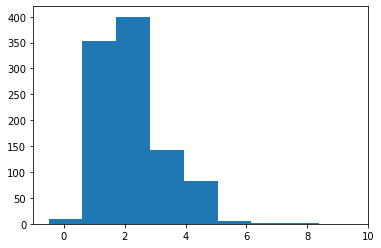

In [391]:
plt.hist(counts, bins=np.linspace(-.5,9.5,10))

**D**: Do the results match your expectation?  If not, why not?  Where are some places this model might improve?  Do you think that the duration of a possession should be independent of whether or not that possession generated points?  Should possessions in overtime follow the same distributions as the average regular-season, non-overtime possessions?

Things to maybe note:
- Indepence of duration/outcome is a terrible assumption (drives without points should be shorter)
- Field goals are "easier" than TDs, so in practice the FG rate should skyrocket and the TD rate plummet once we're in "next score wins"
- Teams are more likely to play to match their opponent when needed (Team 1 after Team 0 scores a FG), since they are forced to "try harder" with things like going for it on 4th down.

Whether or not you know much about American Football, you should always recognize that simplified models for complex games can catch the broad strokes of whether or not a team has an advantage, but modelling the exact decision making is **much harder**!